## Observations and Insights 

In [240]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [11]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [17]:


# Combine the data into a single dataset

# sorted the values on Mouse ID
mergeddata_df = pd.merge(mouse_metadata,study_results,how="outer",on ='Mouse ID',sort='TRUE')
#mergeddata_df.sort_values('Mouse ID')
#mergeddata_df.sort_index(axis=0)

# Display the data table for preview

mergeddata_df


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        a203    Infubinol  Female          20          23          0   
1        a203    Infubinol  Female          20          23          5   
2        a203    Infubinol  Female          20          23         10   
3        a203    Infubinol  Female          20          23         15   
4        a203    Infubinol  Female          20          23         20   
...       ...          ...     ...         ...         ...        ...   
1888     z969     Naftisol    Male           9          30         25   
1889     z969     Naftisol    Male           9          30         30   
1890     z969     Naftisol    Male           9          30         35   
1891     z969     Naftisol    Male           9          30         40   
1892     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              48.508468                 0  
2              51.852437                 1  
3              52.777870                 1  
4              55.173336                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [21]:
# Checking the number of mice.
len(mergeddata_df.value_counts('Mouse ID'))

249

In [50]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
len(mergeddata_df['Timepoint'])
# Optional: Get all the data for the duplicate mouse ID. 

#mdata2=mergeddata_df.groupby(['Mouse ID','Timepoint'])
#mdata2=mergeddata_df.groupby(['Mouse ID','Timepoint']).Timepoint.nunique()
#mdata2=mergeddata_df.groupby(['Mouse ID','Timepoint']).Timepoint.value_counts()
#print(len(mdata2))
#mdata2
# mdata2.size()
#mergeddata_df.drop_duplicates()


1893

In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mergeNodup_df=mergeddata_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
print(len(mergeNodup_df))
#df.drop_duplicates(subset=['brand', 'style']
mergeNodup_df.head()

1888


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     a203    Infubinol  Female          20          23          0   
1     a203    Infubinol  Female          20          23          5   
2     a203    Infubinol  Female          20          23         10   
3     a203    Infubinol  Female          20          23         15   
4     a203    Infubinol  Female          20          23         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           48.508468                 0  
2           51.852437                 1  
3           52.777870                 1  
4           55.173336                 1

In [59]:
# Checking the number of mice in the clean DataFrame.
print(len(mergeNodup_df))

1888


## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
Summ_mergeNodup_df = mergeNodup_df.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
TumVol_mean=Summ_mergeNodup_df['Tumor Volume (mm3)'].mean()
TumVol_median=Summ_mergeNodup_df['Tumor Volume (mm3)'].median()
TumVol_StdDev=Summ_mergeNodup_df['Tumor Volume (mm3)'].std()
TumVol_SEM=Summ_mergeNodup_df['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.

NewSumm_df=pd.DataFrame({'Tumor Vol Mean':TumVol_mean,
                        'Tumor Vol Median':TumVol_median,
                         'Tumor Vol Std Deviation':TumVol_StdDev,
                         'Tumor Vol SEM':TumVol_SEM
                        })

NewSumm_df

Tumor Vol Mean  Tumor Vol Median  Tumor Vol Std Deviation  \
Drug Regimen                                                              
Capomulin          40.675741         41.557809                 4.994774   
Ceftamin           52.591172         51.776157                 6.268188   
Infubinol          52.884795         51.820584                 6.567243   
Ketapril           55.235638         53.698743                 8.279709   
Naftisol           54.331565         52.509285                 8.134708   
Placebo            54.033581         52.288934                 7.821003   
Propriva           52.393463         50.909965                 6.568014   
Ramicane           40.216745         40.673236                 4.846308   
Stelasyn           54.233149         52.431737                 7.710419   
Zoniferol          53.236507         51.818479                 6.966589   

              Tumor Vol SEM  
Drug Regimen                 
Capomulin          0.329346  
Ceftamin           0.469821  
Infubinol          0.492236  
Ketapril           0.603860  
Naftisol           0.596466  
Placebo            0.581331  
Propriva           0.525862  
Ramicane           0.320955  
Stelasyn           0.573111  
Zoniferol          0.516398

<AxesSubplot:xlabel='Drug Regimen'>

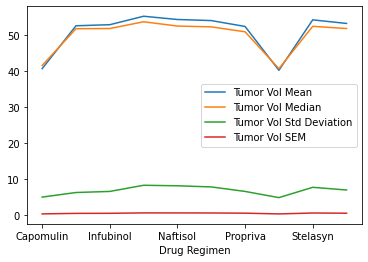

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

NewSumm_df.plot()


## Bar and Pie Charts

Text(0.5, 1.0, 'Drug Regimen Vs No.of Timepoints')

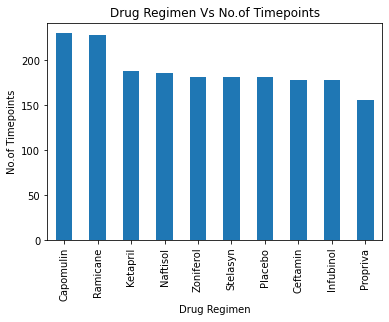

In [77]:
# Generate a bar plot showing the total number of timepoints 
#for all mice tested for each drug regimen using Pandas.
mergeNodup_df['Drug Regimen'].value_counts()

drugRegimen_bar = mergeNodup_df['Drug Regimen'].value_counts().plot(kind='bar')
drugRegimen_bar.set_xlabel("Drug Regimen")
drugRegimen_bar.set_ylabel("No.of Timepoints")
drugRegimen_bar.set_title("Drug Regimen Vs No.of Timepoints")


Text(0.5, 1.0, 'Drug Regimen Vs No.of Timepoints')

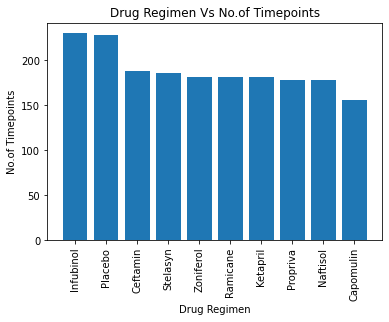

In [101]:
# Generate a bar plot showing the total number of timepoints 
#for all mice tested for each drug regimen using pyplot.
totalno=mergeNodup_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(totalno))
plt.bar(x_axis,totalno)


mergeNodup_df['Drug Regimen'].unique()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,mergeNodup_df['Drug Regimen'].unique())

plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("No.of Timepoints")
plt.title("Drug Regimen Vs No.of Timepoints")


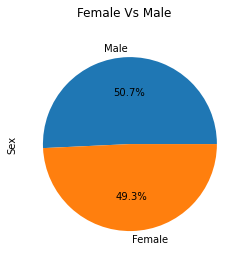

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gendermice_df=mergeNodup_df['Sex'].value_counts()

miceSex_Pie= gendermice_df.plot(kind='pie',subplots=True, title="Female Vs Male",autopct='%1.1f%%')
# miceSex_Pie.set_xlabel("Drug Regimen")
# miceSex_Pie.set_ylabel("No.of Timepoints")
#miceSex_Pie.set_title("Female Vs Male")

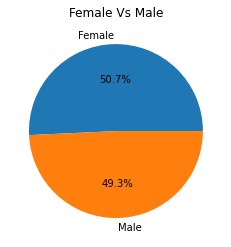

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

totalnomalefem=mergeNodup_df['Sex'].value_counts()

plt.pie(totalnomalefem,labels=mergeNodup_df['Sex'].unique(),autopct='%1.1f%%')


plt.title("Female Vs Male")
plt.show()

## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxpoint_mouse=mergeNodup_df.groupby('Mouse ID')['Timepoint'].max()
maxpoint_mouse_df=pd.DataFrame({"MaxTimepoint": maxpoint_mouse})
maxpoint_mouse_df.head()




# Merge this group df with the original dataframe to get 
#the tumor volume at the last timepoint

orig_maxpoint_merged_df=pd.merge(mergeNodup_df,maxpoint_mouse_df,how="outer",on ='Mouse ID',sort='TRUE')
orig_maxpoint_merged_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        a203    Infubinol  Female          20          23          0   
1        a203    Infubinol  Female          20          23          5   
2        a203    Infubinol  Female          20          23         10   
3        a203    Infubinol  Female          20          23         15   
4        a203    Infubinol  Female          20          23         20   
...       ...          ...     ...         ...         ...        ...   
1883     z969     Naftisol    Male           9          30         25   
1884     z969     Naftisol    Male           9          30         30   
1885     z969     Naftisol    Male           9          30         35   
1886     z969     Naftisol    Male           9          30         40   
1887     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  MaxTimepoint  
0              45.000000                 0            45  
1              48.508468                 0            45  
2              51.852437                 1            45  
3              52.777870                 1            45  
4              55.173336                 1            45  
...                  ...               ...           ...  
1883           63.145652                 2            45  
1884           65.841013                 3            45  
1885           69.176246                 4            45  
1886           70.314904                 4            45  
1887           73.867845                 4            45  

[1888 rows x 9 columns]

In [163]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_tobe_checked=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drugvar in  drugs_tobe_checked: 
    drugloc_df =orig_maxpoint_merged_df.loc[orig_maxpoint_merged_df['Drug Regimen']== drugvar]
    finaltumvol_df=drugloc_df.loc[drugloc_df['Timepoint']==drugloc_df['MaxTimepoint']]
    
    # add subset 
    tumorvol= finaltumvol_df['Tumor Volume (mm3)']
    tumor_vol_list.append(tumorvol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # creating quartiles for each drug
    quartiles = tumorvol.quantile([0.25,.5,.75])
    #print(quartiles)
    
    lower_quartile=  quartiles[.25]
    #print('lower' + str(lower_quartile))
    
    upper_quartile=  quartiles[.75]
    #print('upper' + str(upper_quartile))
     #IQR  = upper - lower 
    IQR = upper_quartile-lower_quartile
    print(f'{drugvar} has IQR : {IQR}')
    
    # Determine outliers using upper and lower bounds
    
    lowerbound=lower_quartile - (IQR*1.5)
    upperbound = upper_quartile + (IQR * 1.5)
    print(f'{drugvar} has lower boundary : {lowerbound}')
    print(f'{drugvar} has upper boundary : {upperbound}')
    
    print(tumorvol.loc[(finaltumvol_df['Tumor Volume (mm3)'] < lowerbound)
                    | (finaltumvol_df['Tumor Volume (mm3)'] > upperbound)] )
    #print('outliers are present')
    cntoutliers=(tumorvol.loc[(finaltumvol_df['Tumor Volume (mm3)'] < lowerbound)
                    | (finaltumvol_df['Tumor Volume (mm3)'] > upperbound)] ).count()
    
    print(cntoutliers)
        
    

Capomulin has IQR : 7.781863460000004
Capomulin has lower boundary : 20.70456164999999
Capomulin has upper boundary : 51.83201549
Series([], Name: Tumor Volume (mm3), dtype: float64)
0
Ramicane has IQR : 9.098536719999998
Ramicane has lower boundary : 17.912664470000003
Ramicane has upper boundary : 54.30681135
Series([], Name: Tumor Volume (mm3), dtype: float64)
0
Infubinol has IQR : 11.477135160000003
Infubinol has lower boundary : 36.83290494999999
Infubinol has upper boundary : 82.74144559000001
275    36.321346
Name: Tumor Volume (mm3), dtype: float64
1
Ceftamin has IQR : 15.577752179999997
Ceftamin has lower boundary : 25.355449580000002
Ceftamin has upper boundary : 87.66645829999999
Series([], Name: Tumor Volume (mm3), dtype: float64)
0


Text(0, 0.5, 'Final Tumor Vol')

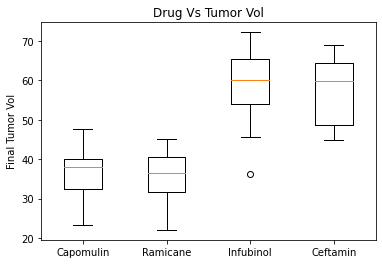

In [169]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol_list)
plt.xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.title("Drug Vs Tumor Vol")
plt.ylabel("Final Tumor Vol")


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume in mm')

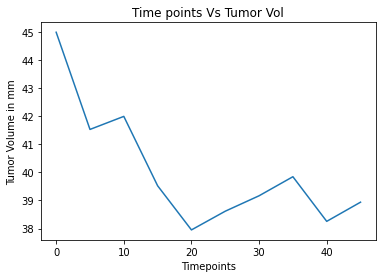

In [171]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseid=mergeNodup_df.loc[mergeNodup_df["Mouse ID"] =='b742']

plt.plot(mouseid["Timepoint"],mouseid["Tumor Volume (mm3)"])
plt.title("Time points Vs Tumor Vol")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume in mm")



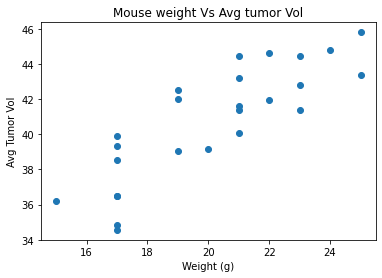

In [216]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drugCapomulin_df = mergeNodup_df.loc[mergeNodup_df["Drug Regimen"]=='Capomulin']
drugCapomulin_df

drugCapomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
new_drugCapomulin_df = pd.DataFrame({"Avg Tumor Vol":drugCapomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()})

#new_drugCapomulin_df


#weight=drugCapomulin_df.groupby(["Mouse ID"])["Weight (g)"]
#drugCapomulin_df["weight"]=drugCapomulin_df.groupby(["Mouse ID"])["Weight (g)"]
#=new_drugCapomulin_df.append({"Weight":drugCapomulin_df.groupby(["Mouse ID"])["Weight (g)"]})
#plt.scatter(new_drugCapomulin_df)
df=new_drugCapomulin_df.assign(weight=drugCapomulin_df.groupby(["Mouse ID"])["Weight (g)"].unique())
df
plt.scatter(df["weight"],df["Avg Tumor Vol"])

plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Vol")
plt.title("Mouse weight Vs Avg tumor Vol")
plt.show()

## Correlation and Regression

(0.8419363424694717, 1.322572243471279e-07)


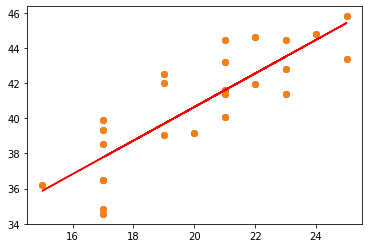

In [241]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
drugCapomulin_df = mergeNodup_df.loc[mergeNodup_df["Drug Regimen"]=='Capomulin']
drugCapomulin_df

drugCapomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
new_drugCapomulin_df = pd.DataFrame({"Avg Tumor Vol":drugCapomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()})

#new_drugCapomulin_df


#weight=drugCapomulin_df.groupby(["Mouse ID"])["Weight (g)"]
#drugCapomulin_df["weight"]=drugCapomulin_df.groupby(["Mouse ID"])["Weight (g)"]
#=new_drugCapomulin_df.append({"Weight":drugCapomulin_df.groupby(["Mouse ID"])["Weight (g)"]})
#plt.scatter(new_drugCapomulin_df)
df=new_drugCapomulin_df.assign(weight=drugCapomulin_df.groupby(["Mouse ID"])["Weight (g)"].unique())
df

xaxis=df["weight"].astype(float)
y=df["Avg Tumor Vol"].astype(float)
corr=st.pearsonr(xaxis,y)
print(corr)

plt.scatter(xaxis,y)

(slope,intercept,rvalue,pvalue,stderr)=linregress(xaxis,y)
regress_values=x * slope + intercept
line_eq = "y= " +str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xaxis,y)
plt.plot(xaxis,regress_values,"r-")